The following example shows how to log data for training. The log data will be saved into data/training folder

[PropellerLookupTable] Reading data from ..\inflow_model\lookup_table\apc_8x6_with_trail.yaml
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
Map data read from: ..\data\map\figure_8.pkl
phi net input output fields:
input ['position_x', 'position_y', 'position_z', 'q_0', 'q_1', 'q_2', 'q_3', 'v_x', 'v_y', 'v_z', 'omega_x', 'omega_y', 'omega_z', 'f_ctrl_input_z', 'torque_ctrl_input_x', 'torque_ctrl_input_y', 'torque_ctrl_input_z', 'rotor_0_rotation_spd', 'rotor_1_rotation_spd', 'rotor_2_rotation_spd', 'rotor_3_rotation_spd']
label ['f_disturb_x', 'f_disturb_y', 'f_disturb_z']
[PropellerLookupTable] Reading data from ..\inflow_model\lookup_table\apc_8x6_with_trail.yaml
DroneController: using inflow model:  True
DroneController: using disturbance estimator:  True
DroneController: using baseline disturbance estimator:  True
number of controller steps per simul

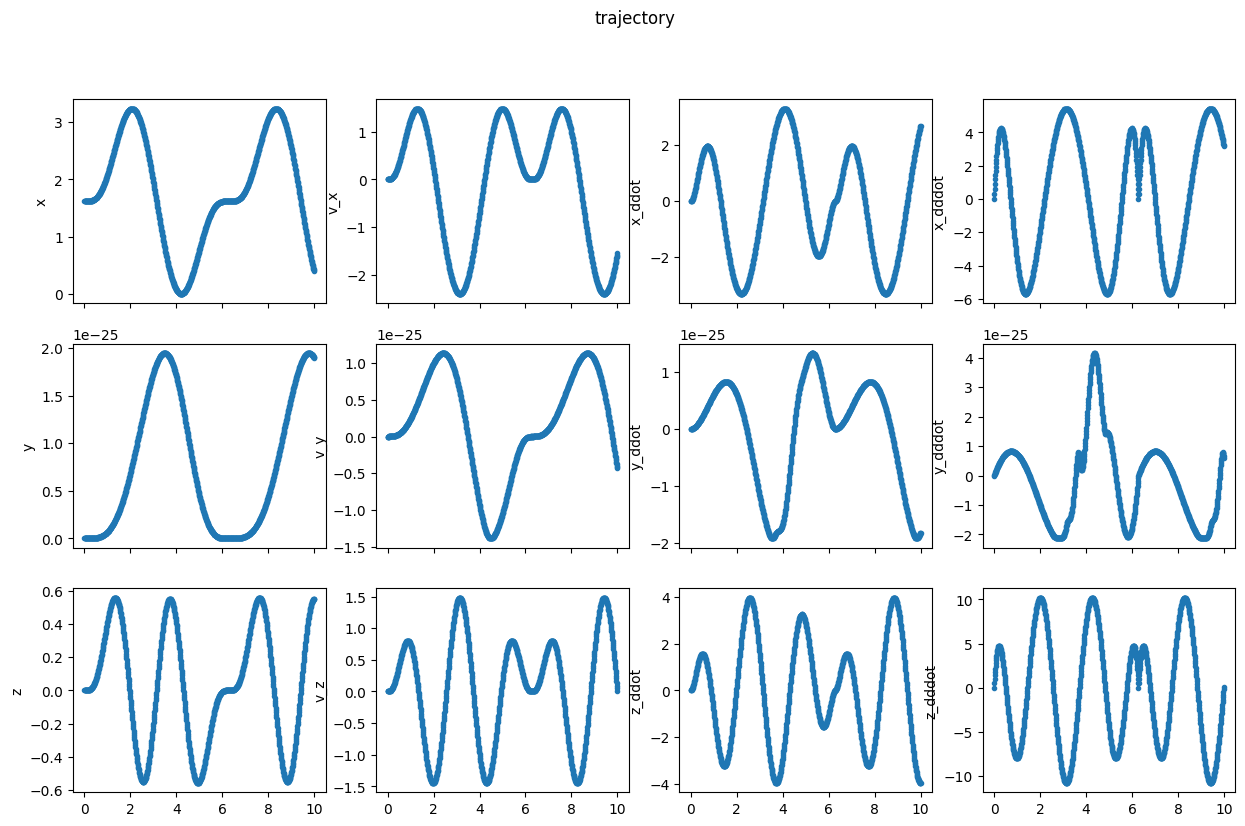

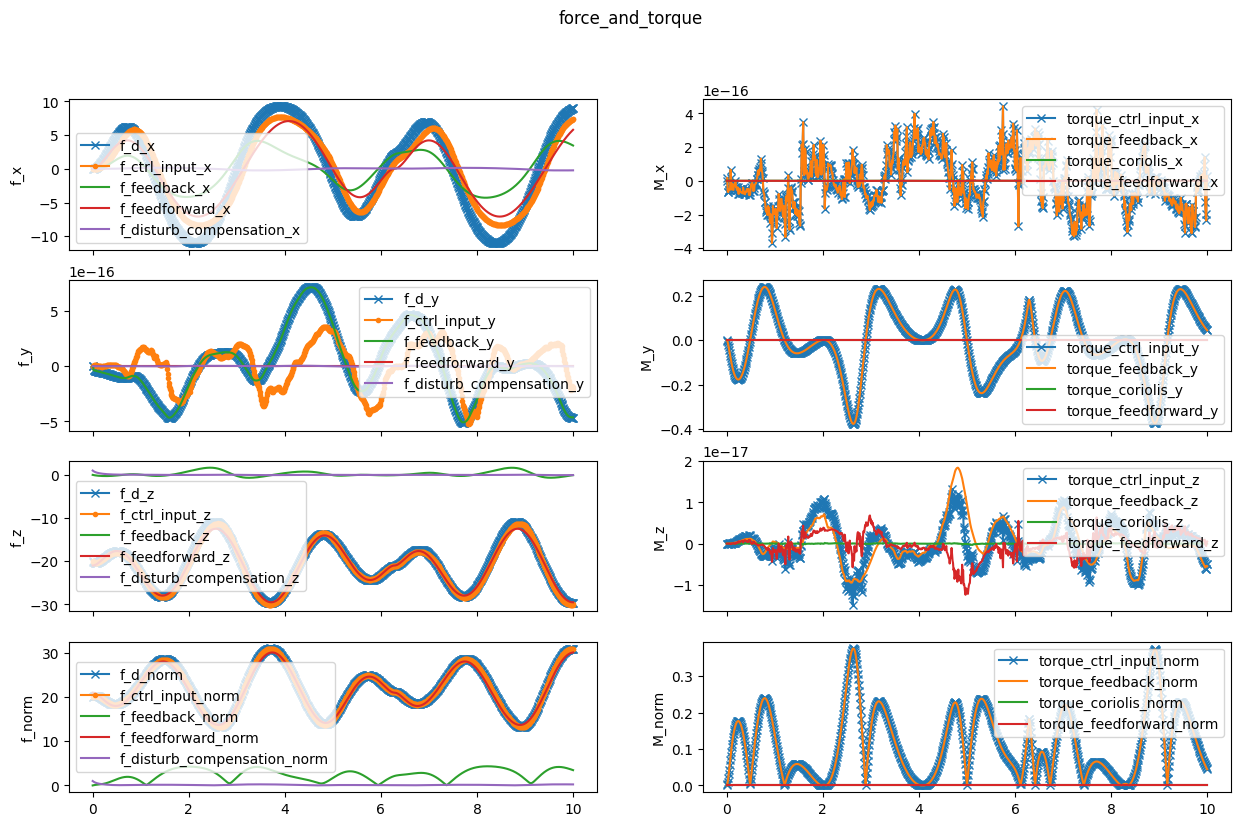

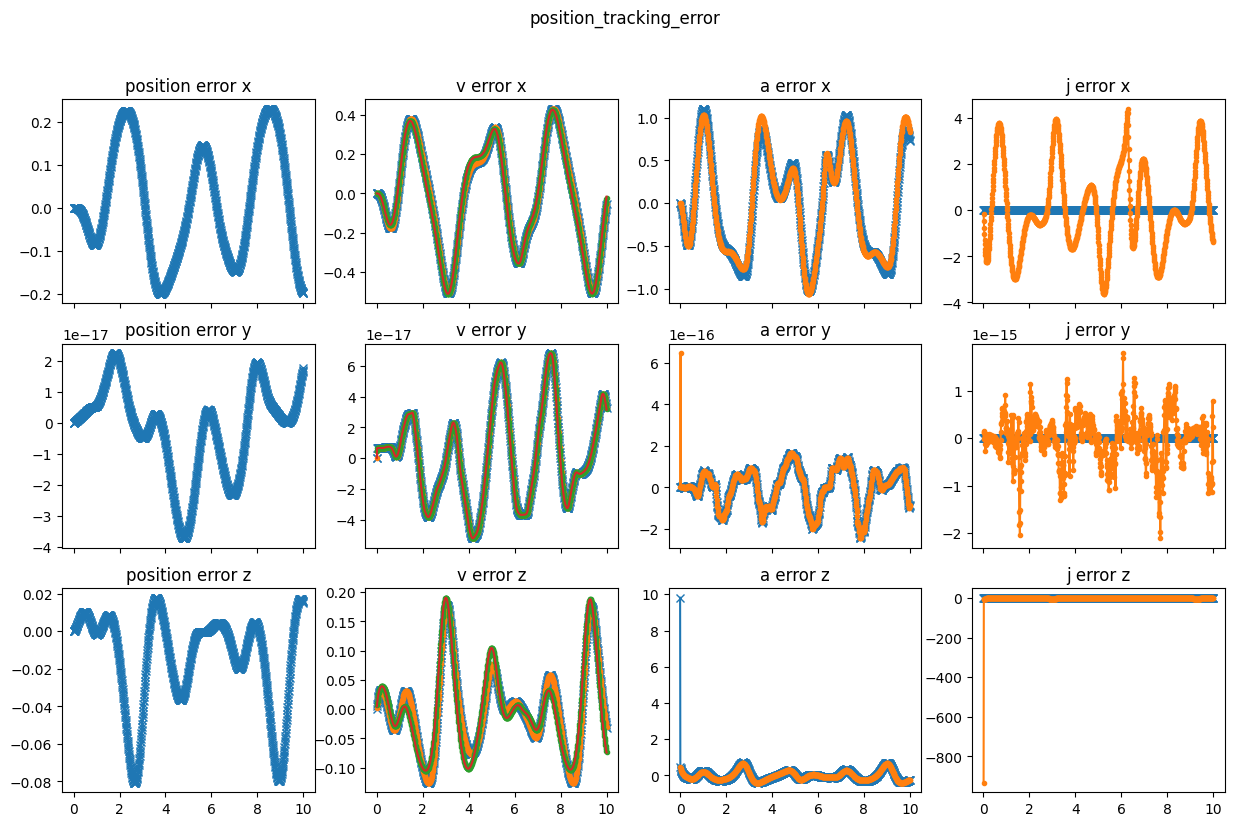

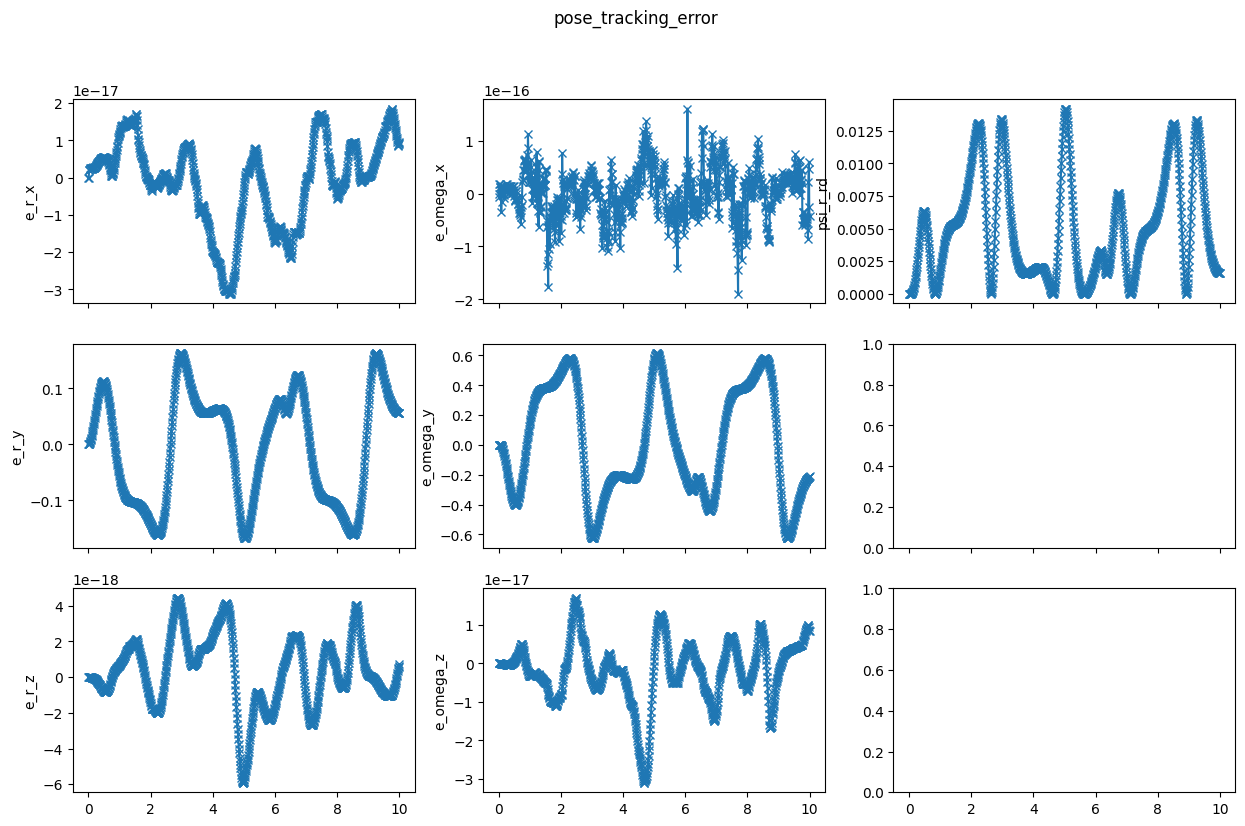

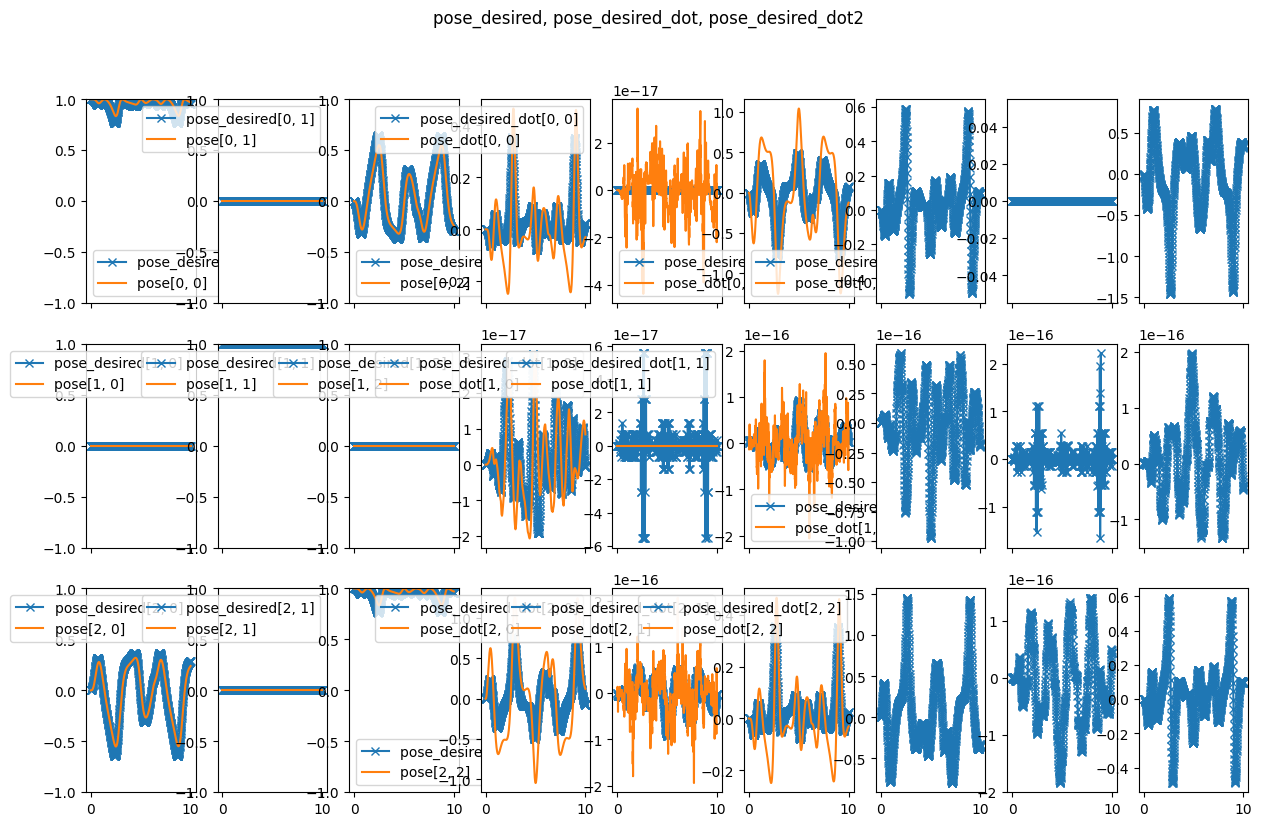

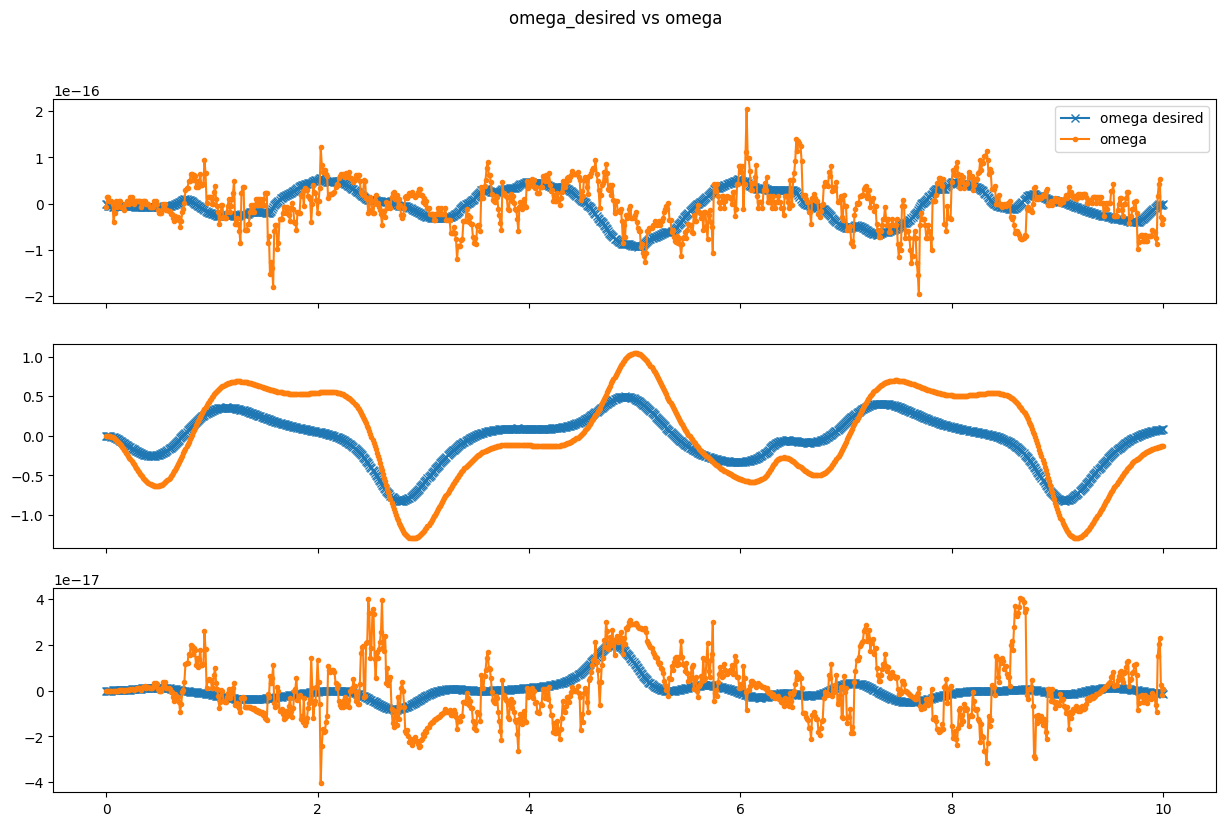

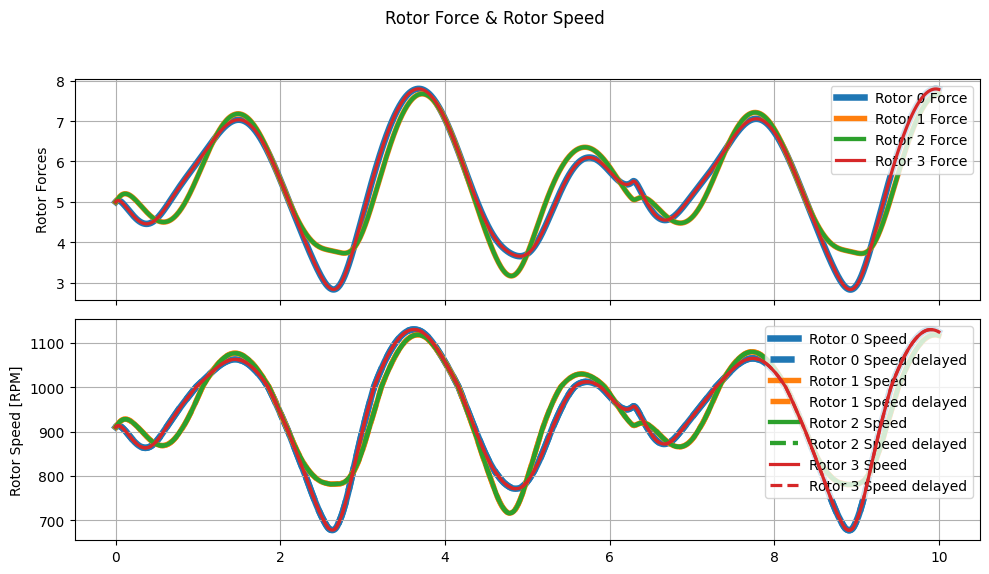

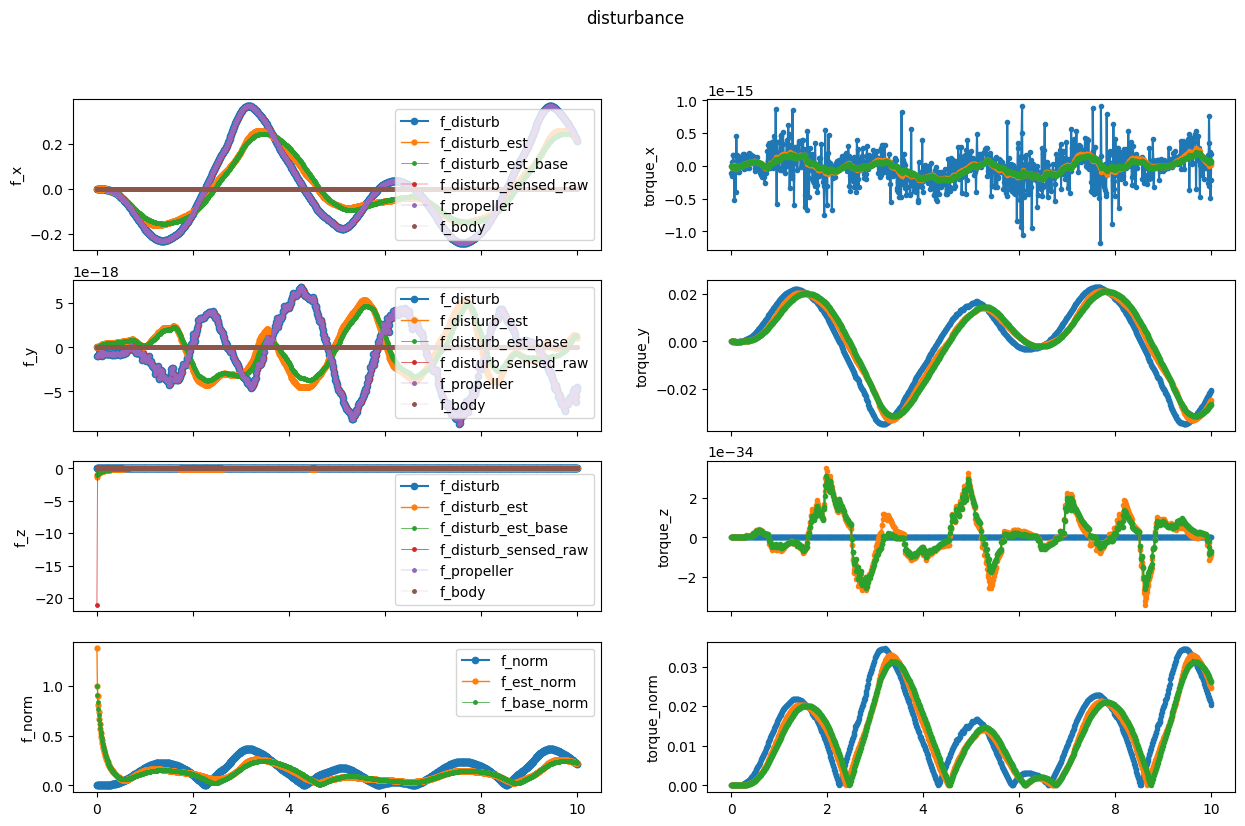

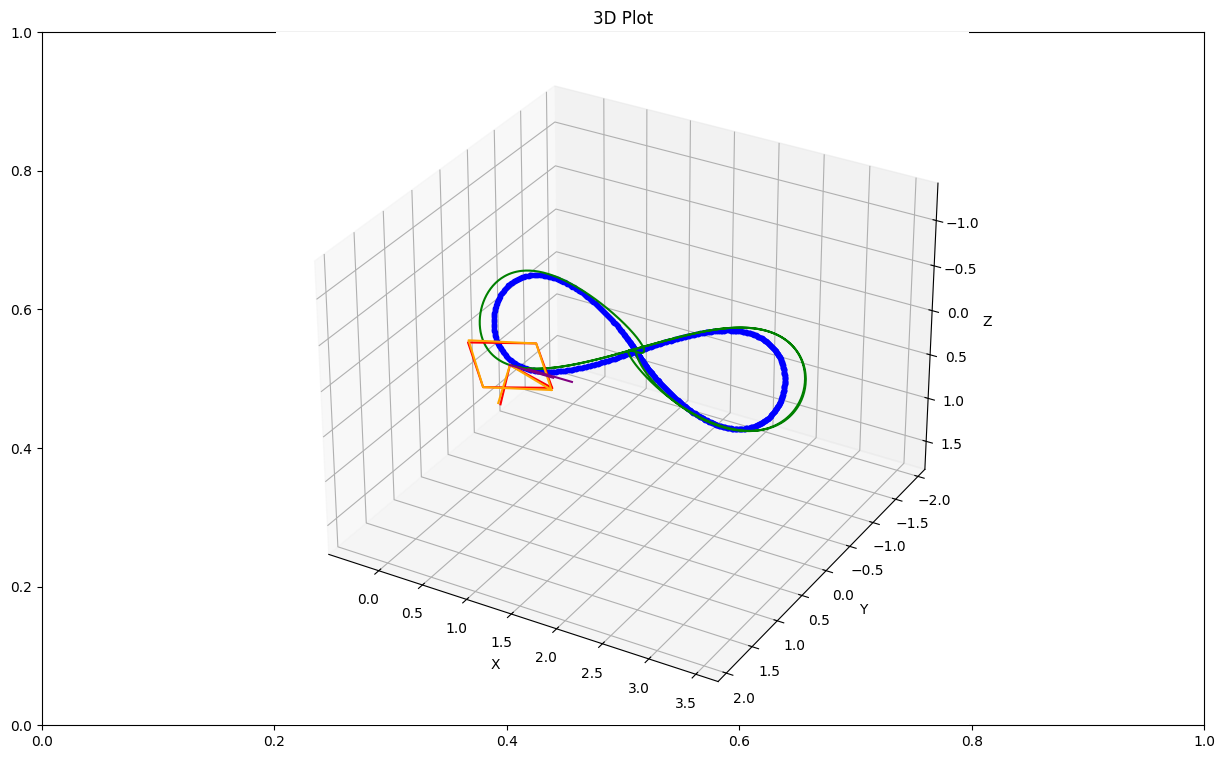

In [2]:
# %matplotlib tk
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

# Get the current directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import manager
import drone.trajectory
import drone.disturbance_model

plt.rcParams['figure.figsize'] = [15, 9]

wall_distance = -0.5
# wall_distance = 10.0
wind_speed_x = 0.0
wind_speed_y = 0.0
wind_speed_z = 0.0

sim_test = manager.Manager()
model = drone.disturbance_model.WindEffectNearWall(wall_origin=np.array([-wall_distance, 0, 0]), 
                                                    u_free = np.array([wind_speed_x, wind_speed_y, wind_speed_z]))
# model = drone.disturbance_model.Free()    # debug only
# trajectory=drone.trajectory.RandomWaypointsInConstrainedSpace(200, False)
trajectory = drone.trajectory.Figure8(5)
# trajectory = drone.trajectory.Hover()
sim_test.set_up(disturbance_model=model, trajectory=trajectory)

sim_test.run(10.0) 
# sim_test.save_result_as_csv('test')
sim_test.plot()
plt.show()

To compare the desired pose and actual pose, use the following command.

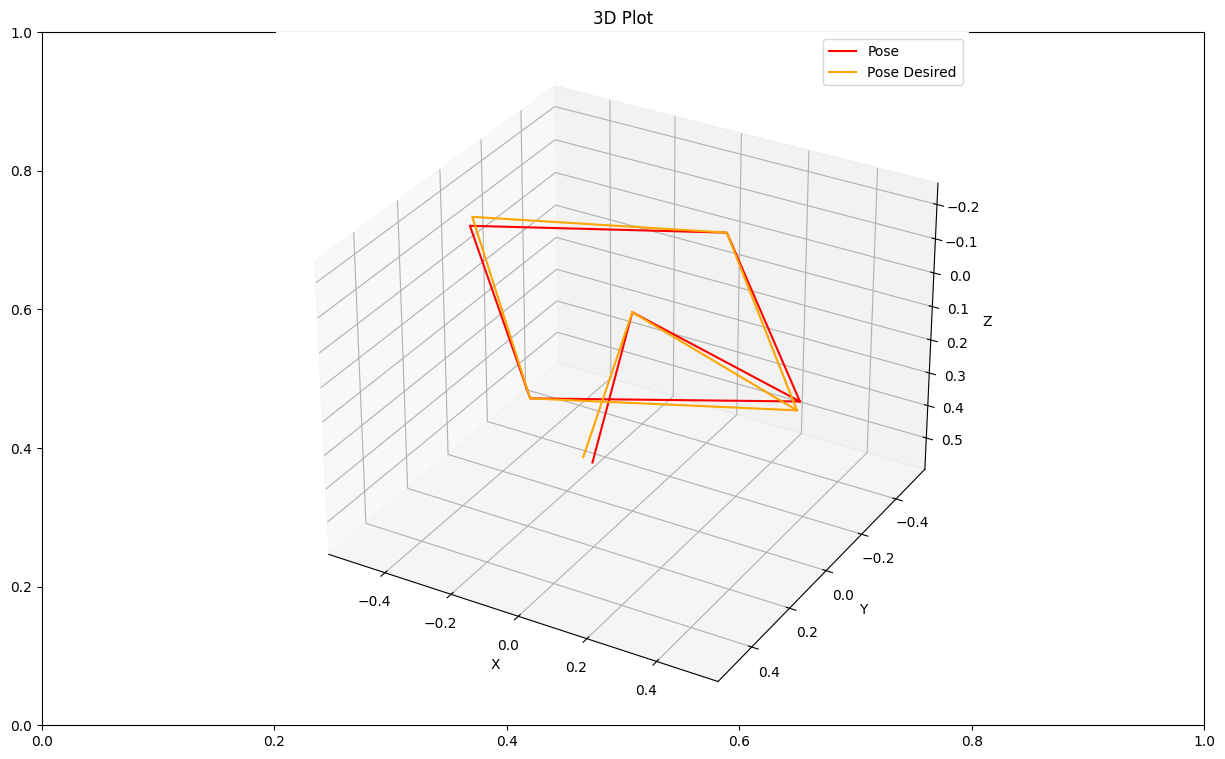

In [2]:
sim_test.result.plot_pose_in_given_time(sim_test.logger.output, 15.0)

Pop out a specific figure to zoom in.

In [3]:
%matplotlib tk
sim_test.result.plot_disturbance_force(sim_test.logger.output)
sim_test.result.plot_rotor(sim_test.logger.output)
# sim_test.plot()